# Лабораторная работа №1 «Явные методы Рунге-Кутты»

## Дашкевич Артём Владимирович
## Вариант 4

### Скрин постановки задачи:
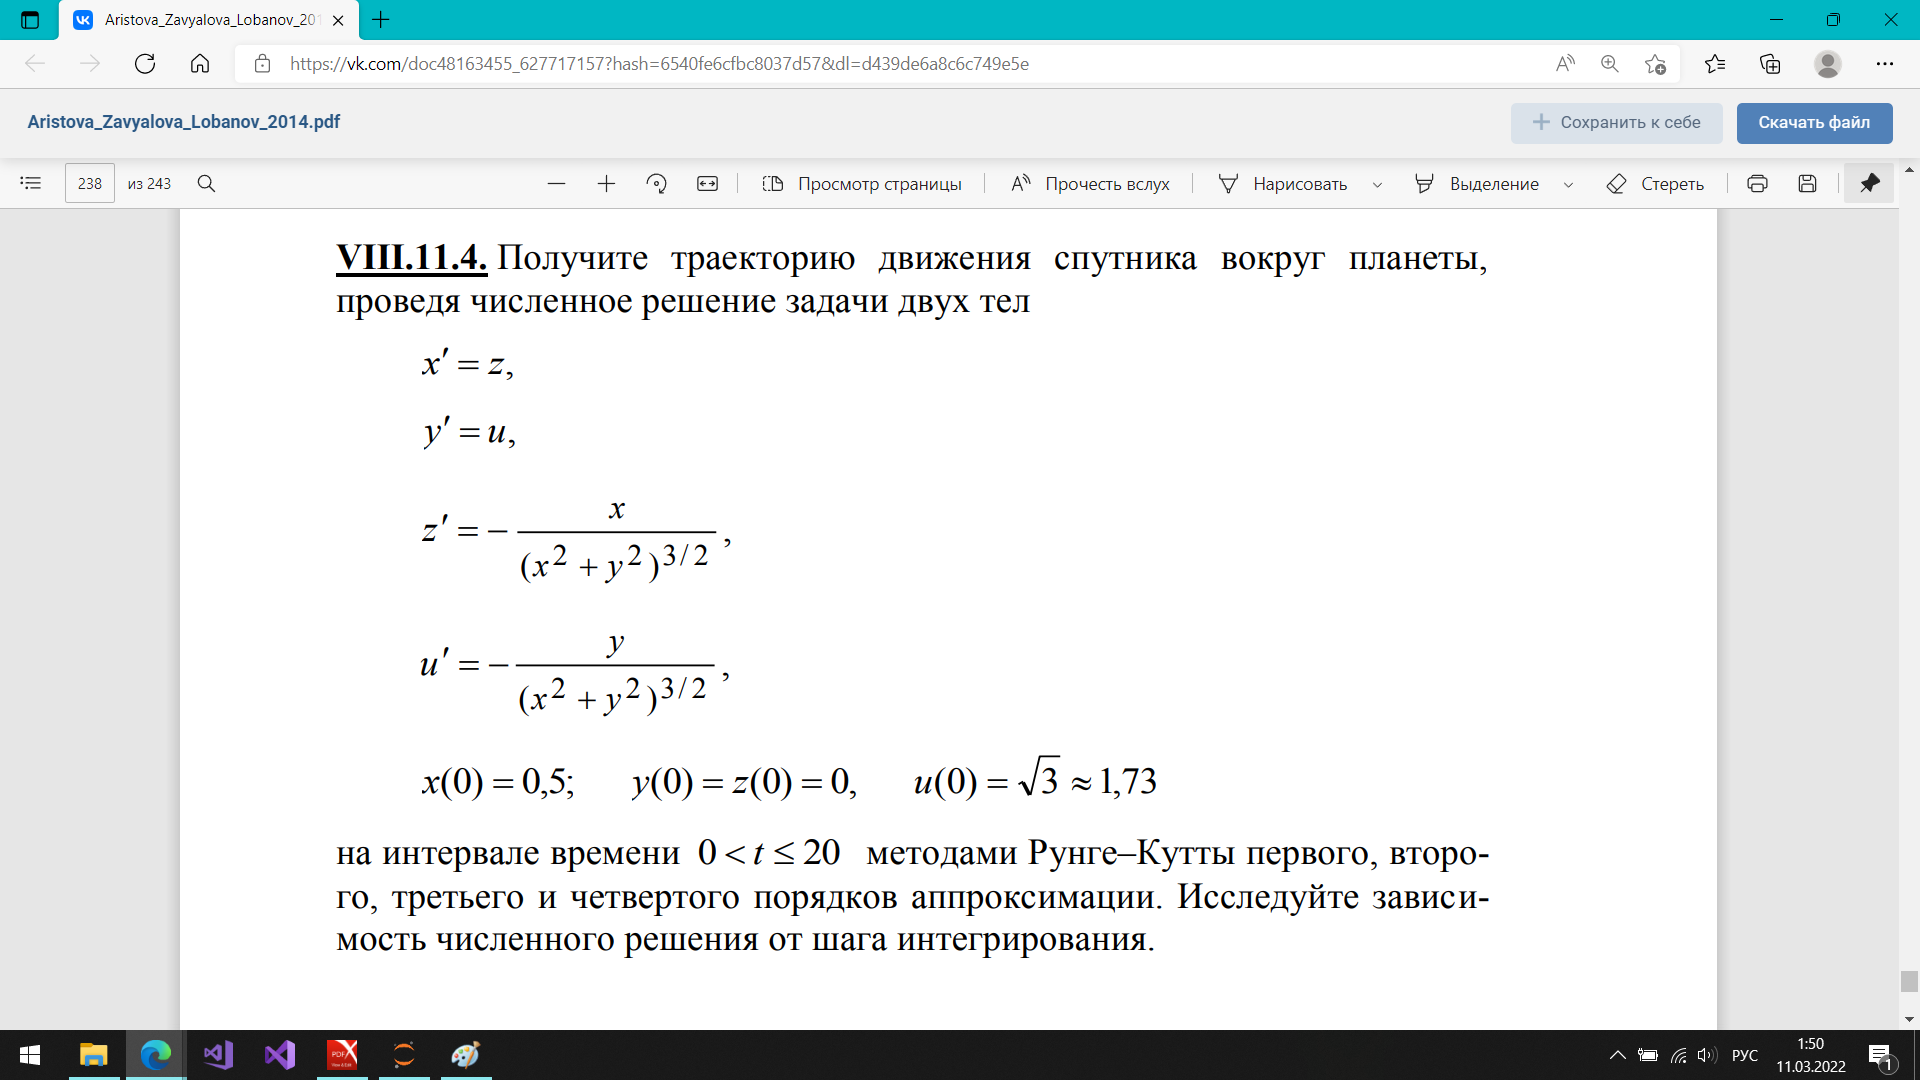

### Описание метода:
В ходе данной задачи используются методы Рунге-Кутты. Это одношаговые методы, позволяющие найти частные решения системы дифференциальных уравнений. Общая схема расчёта значения функции в каждой последующей точке:  
  
y_n+1 = y_n + h(b_1 * K_1 + ... + b_s * k_s)  
K_1 = f(x_n + c_1 * h, y_n + a_11 * h * K_1 + ... + a_1s * h * K_s)   

...  

K_s = f(x_n + c_s * h, y_n + a_s1 * h * K_1 + ... + a_ss * h * K_s)  
  
Коэффициенты a_ij, b_k, c_l - константы из таблицы Бутчера

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [108]:
h_min_degree = -4
h_max_degree = 0
x_0 = 0.5
y_0 = 0
z_0 = 0
u_0 = math.sqrt(3)
max_time = 20

In [109]:
def regulate_size(new_size):
    time_array = [0] * new_size
    for i in range(new_size):
        time_array[i] = h * i

    x = [0] * size
    x[0] = x_0

    y = [0] * size
    y[0] = y_0

    z = [0] * size
    z[0] = z_0

    u = [0] * size
    u[0] = u_0
    
    return time_array, x, y, z, u

### Таблица Бутчер для метода 1-го порядка:    
|     0     |       0      |  
|:---------:|:------------:|  
|           |       1      |

Stride =  1


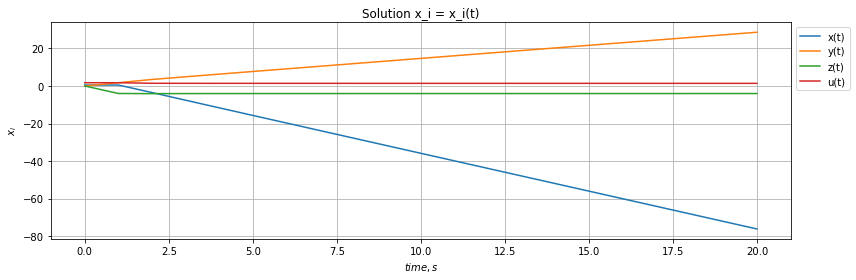

Stride =  0.1


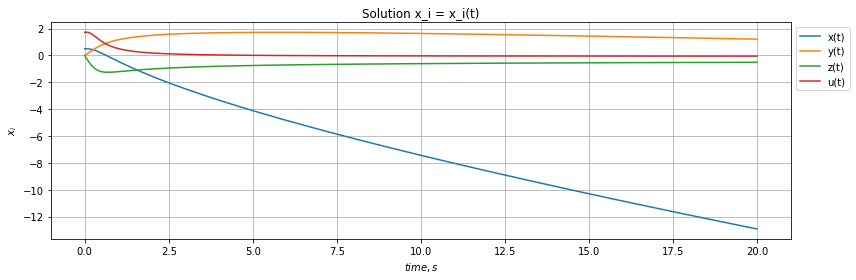

Stride =  0.01


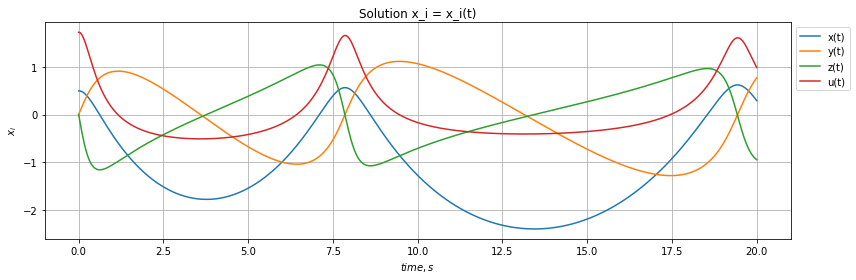

Stride =  0.001


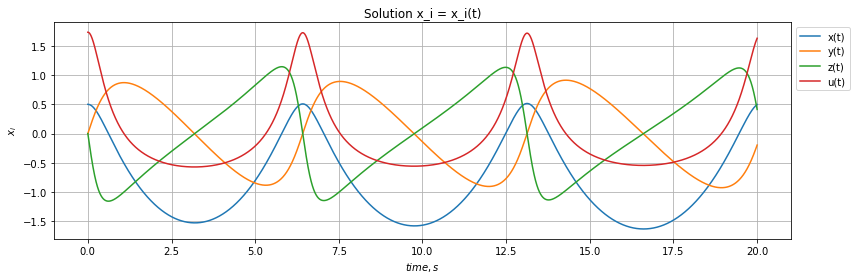

In [110]:
# 1st order

def solve_1st(x, y, z, u, h):
    k = [0] * 4
    for i in range(size - 1):
        k[0] = z[i]
        k[1] = u[i]
        k[2] = - x[i] / (x[i] ** 2 + y[i] ** 2) ** (3 / 2)
        k[3] = - y[i] / (x[i] ** 2 + y[i] ** 2) ** (3 / 2)
        x[i + 1] = x[i] + h * k[0]
        y[i + 1] = y[i] + h * k[1]
        z[i + 1] = z[i] + h * k[2]
        u[i + 1] = u[i] + h * k[3]

for degree in range(h_max_degree, h_min_degree, -1):
    
    h = 10 ** degree
    size = int(max_time / h + 1)
    print("Stride = ", h)
    
    time_array, x, y, z, u = regulate_size(size)
    
    solve_1st(x, y, z, u, h)

    plt.figure(figsize=[12, 4])
    plt.plot(time_array, x, label='x(t)')
    plt.plot(time_array, y, label='y(t)')
    plt.plot(time_array, z, label='z(t)')
    plt.plot(time_array, u, label='u(t)')

    plt.title("Solution x_i = x_i(t)")
    plt.xlabel("$time, s$")
    plt.ylabel("$x_i$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()


### Таблица Бутчер для метода 2-го порядка:    
|     0     |              |              |  
|:---------:|:------------:|:------------:|  
|    1/2    |      1/2     |              |  
|           |       0      |       1      |

Stride =  1


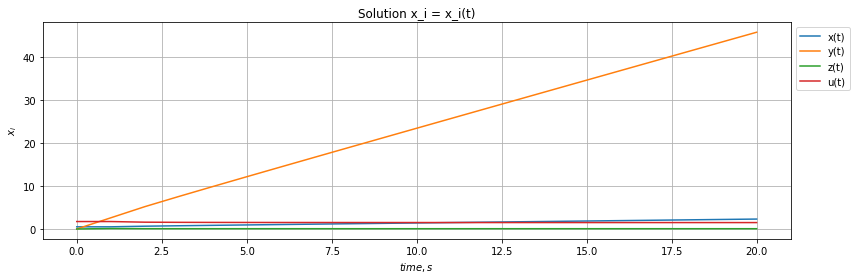

Stride =  0.1


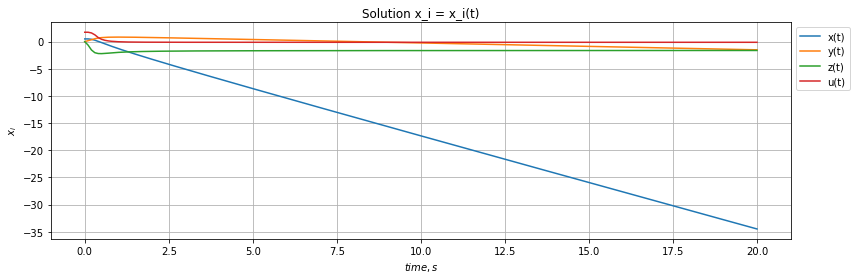

Stride =  0.01


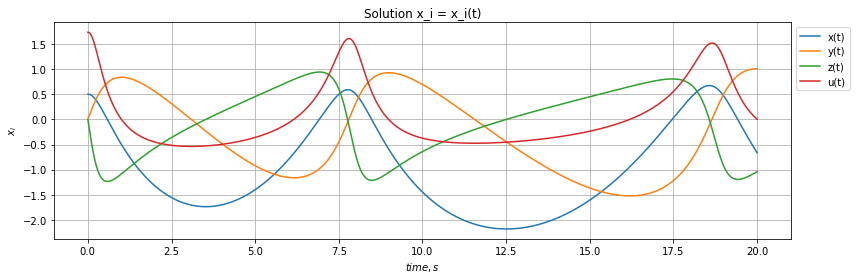

Stride =  0.001


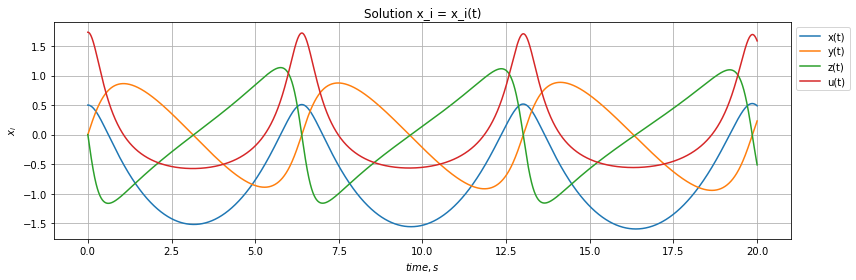

In [114]:
# 2nd order

def solve_2nd(x, y, z, u, h):
    k_1 = [0] * 4
    k_2 = [0] * 4

    for i in range(size - 1):
    
        k_1[0] = z[i]
        k_1[1] = u[i]
        k_1[2] = - x[i] / (x[i] ** 2 + y[i] ** 2) ** (3 / 2)
        k_1[3] = - y[i] / (x[i] ** 2 + y[i] ** 2) ** (3 / 2)
    
        k_2[0] = z[i] + 1 / 2 * h * k_1[0]
        k_2[1] = u[i] + 1 / 2 * h * k_1[1]
        k_2[2] = - (x[i] + 1 / 2 * h * k_1[2]) / ((x[i] + 1 / 2 * h * k_1[2]) ** 2 + (y[i] + 1 / 2 * h * k_1[2]) ** 2) ** (3 / 2)
        k_2[3] = - (y[i] + 1 / 2 * h * k_1[3]) / ((x[i] + 1 / 2 * h * k_1[3]) ** 2 + (y[i] + 1 / 2 * h * k_1[3]) ** 2) ** (3 / 2)
    
        x[i + 1] = x[i] + h * k_2[0]
        y[i + 1] = y[i] + h * k_2[1]
        z[i + 1] = z[i] + h * k_2[2]
        u[i + 1] = u[i] + h * k_2[3]

for degree in range(h_max_degree, h_min_degree, -1):
    
    h = 10 ** degree
    size = int(max_time / h + 1)
    print("Stride = ", h)
    
    time_array, x, y, z, u = regulate_size(size)
    
    solve_2nd(x, y, z, u, h)

    plt.figure(figsize=[12, 4])
    plt.plot(time_array, x, label='x(t)')
    plt.plot(time_array, y, label='y(t)')
    plt.plot(time_array, z, label='z(t)')
    plt.plot(time_array, u, label='u(t)')

    plt.title("Solution x_i = x_i(t)")
    plt.xlabel("$time, s$")
    plt.ylabel("$x_i$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

### Таблица Бутчер для метода 3-го порядка:    
|     0     |              |              |              |  
|:---------:|:------------:|:------------:|:------------:|  
|    1/2    |      1/2     |              |              |  
|     1     |       0      |       1      |              |   
|           |      1/6     |      2/3     |      1/6     |

Stride =  1


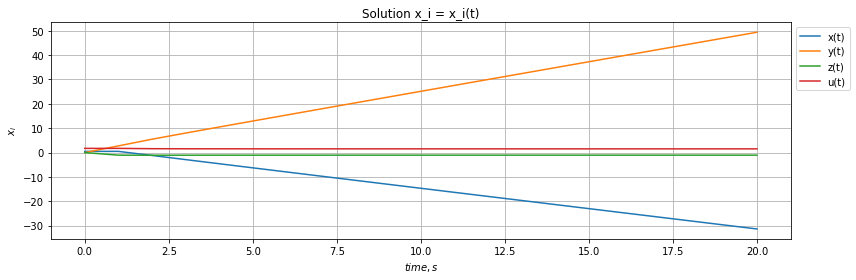

Stride =  0.1


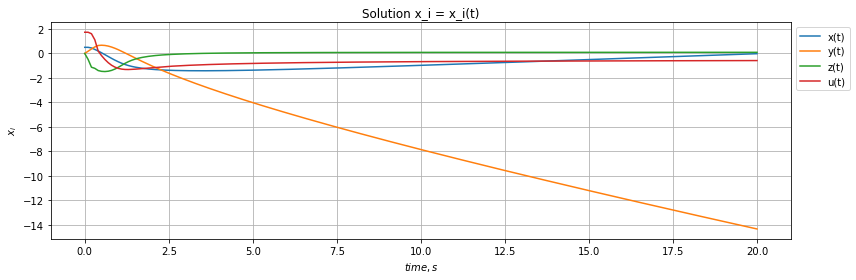

Stride =  0.01


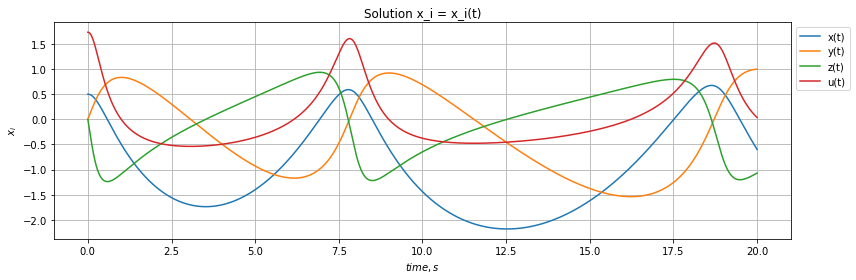

Stride =  0.001


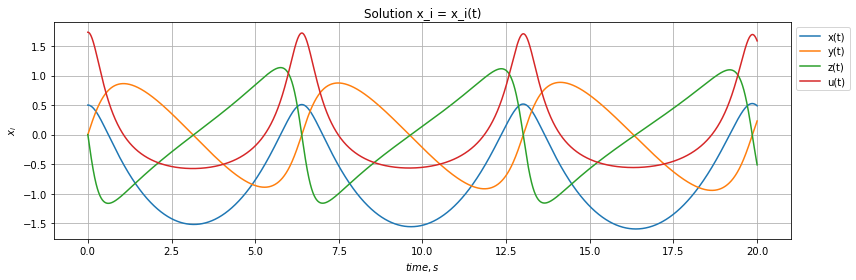

In [112]:
# 3rd order

def solve_3rd(x, y, z, u, h):
    k_1 = [0] * 4
    k_2 = [0] * 4
    k_3 = [0] * 4

    for i in range(size - 1):
    
        k_1[0] = z[i]
        k_1[1] = u[i]
        k_1[2] = - x[i] / (x[i] ** 2 + y[i] ** 2) ** (3 / 2)
        k_1[3] = - y[i] / (x[i] ** 2 + y[i] ** 2) ** (3 / 2)
    
        k_2[0] = z[i] + 1 / 2 * h * k_1[0]
        k_2[1] = u[i] + 1 / 2 * h * k_1[1]
        k_2[2] = - (x[i] + 1 / 2 * h * k_1[2]) / ((x[i] + 1 / 2 * h * k_1[2]) ** 2 + (y[i] + 1 / 2 * h * k_1[2]) ** 2) ** (3 / 2)
        k_2[3] = - (y[i] + 1 / 2 * h * k_1[3]) / ((x[i] + 1 / 2 * h * k_1[3]) ** 2 + (y[i] + 1 / 2 * h * k_1[3]) ** 2) ** (3 / 2)
    
        k_3[0] = z[i] + h * k_2[0]
        k_3[1] = u[i] + h * k_2[1]
        k_3[2] = - (x[i] + h * k_2[2]) / ((x[i] + h * k_2[2]) ** 2 + (y[i] + h * k_2[2]) ** 2) ** (3 / 2)
        k_3[3] = - (y[i] + h * k_2[3]) / ((x[i] + h * k_2[3]) ** 2 + (y[i] + h * k_2[3]) ** 2) ** (3 / 2)
    
        x[i + 1] = x[i] + 1 / 6 * h * k_1[0] + 2 / 3 * h * k_2[0] + 1 / 6 * h * k_3[0]
        y[i + 1] = y[i] + 1 / 6 * h * k_1[1] + 2 / 3 * h * k_2[1] + 1 / 6 * h * k_3[1]
        z[i + 1] = z[i] + 1 / 6 * h * k_1[2] + 2 / 3 * h * k_2[2] + 1 / 6 * h * k_3[2]
        u[i + 1] = u[i] + 1 / 6 * h * k_1[3] + 2 / 3 * h * k_2[3] + 1 / 6 * h * k_3[3]

for degree in range(h_max_degree, h_min_degree, -1):
    
    h = 10 ** degree
    size = int(max_time / h + 1)
    print("Stride = ", h)
    
    time_array, x, y, z, u = regulate_size(size)
    
    solve_3rd(x, y, z, u, h)

    plt.figure(figsize=[12, 4])
    plt.plot(time_array, x, label='x(t)')
    plt.plot(time_array, y, label='y(t)')
    plt.plot(time_array, z, label='z(t)')
    plt.plot(time_array, u, label='u(t)')

    plt.title("Solution x_i = x_i(t)")
    plt.xlabel("$time, s$")
    plt.ylabel("$x_i$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

### Таблица Бутчер для метода 4-го порядка:    
|     0     |              |              |              |              |  
|:---------:|:------------:|:------------:|:------------:|:------------:|  
|    1/2    |      1/2     |              |              |              |  
|    1/2    |       0      |      1/2     |              |              |   
|     1     |       0      |       0      |       1      |       0      |  
|           |      1/6     |      2/6     |      2/6     |      1/6     |

Stride =  1


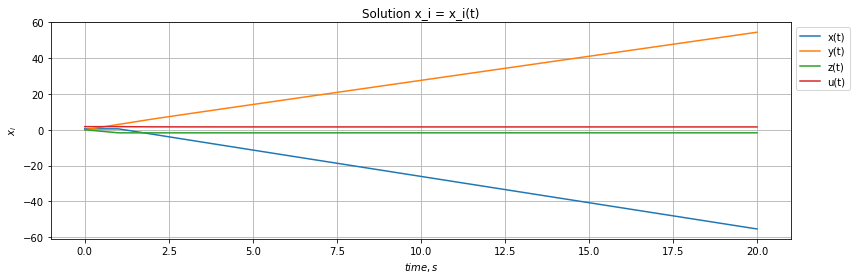

Stride =  0.1


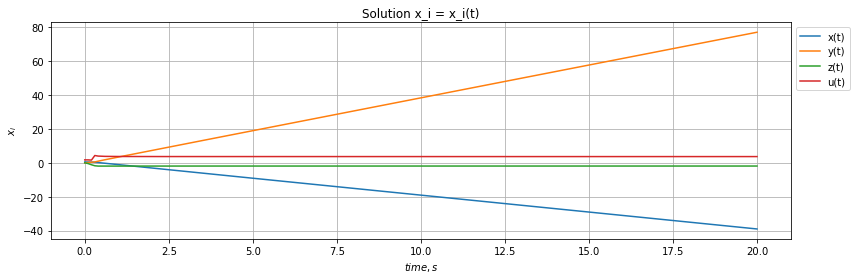

Stride =  0.01


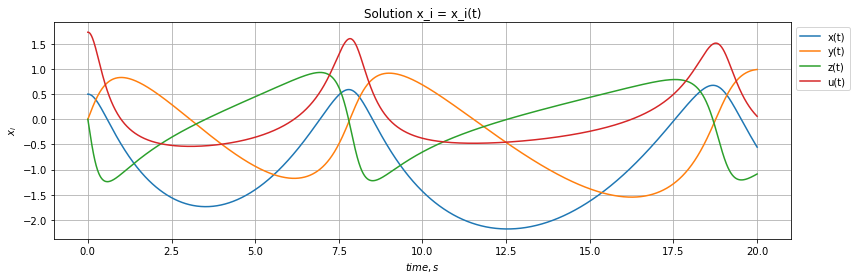

Stride =  0.001


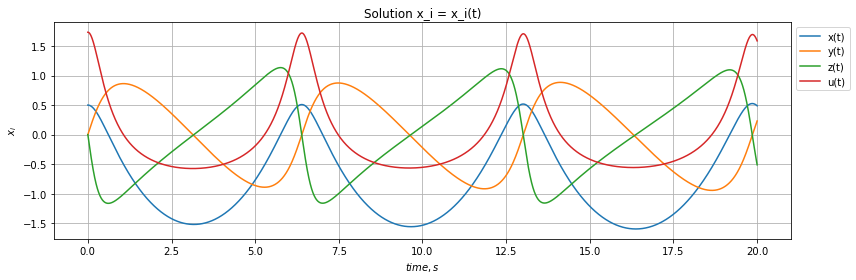

In [113]:
# 4th order

def solve_4th(x, y, z, u, h):
    k_1 = [0] * 4
    k_2 = [0] * 4
    k_3 = [0] * 4
    k_4 = [0] * 4

    for i in range(size - 1):
    
        k_1[0] = z[i]
        k_1[1] = u[i]
        k_1[2] = - x[i] / (x[i] ** 2 + y[i] ** 2) ** (3 / 2)
        k_1[3] = - y[i] / (x[i] ** 2 + y[i] ** 2) ** (3 / 2)
    
        k_2[0] = z[i] + 1 / 2 * h * k_1[0]
        k_2[1] = u[i] + 1 / 2 * h * k_1[1]
        k_2[2] = - (x[i] + 1 / 2 * h * k_1[2]) / ((x[i] + 1 / 2 * h * k_1[2]) ** 2 + (y[i] + 1 / 2 * h * k_1[2]) ** 2) ** (3 / 2)
        k_2[3] = - (y[i] + 1 / 2 * h * k_1[3]) / ((x[i] + 1 / 2 * h * k_1[3]) ** 2 + (y[i] + 1 / 2 * h * k_1[3]) ** 2) ** (3 / 2)
    
        k_3[0] = z[i] + 1 / 2 * h * k_2[0]
        k_3[1] = u[i] + 1 / 2 * h * k_2[1]
        k_3[2] = - (x[i] + 1 / 2 * h * k_2[2]) / ((x[i] + 1 / 2 * h * k_2[2]) ** 2 + (y[i] + 1 / 2 * h * k_2[2]) ** 2) ** (3 / 2)
        k_3[3] = - (y[i] + 1 / 2 * h * k_2[3]) / ((x[i] + 1 / 2 * h * k_2[3]) ** 2 + (y[i] + 1 / 2 * h * k_2[3]) ** 2) ** (3 / 2)
    
        k_4[0] = z[i] + h * k_3[0]
        k_4[1] = u[i] + h * k_3[1]
        k_4[2] = - (x[i] + h * k_3[2]) / ((x[i] + h * k_3[2]) ** 2 + (y[i] + h * k_3[2]) ** 2) ** (3 / 2)
        k_4[3] = - (y[i] + h * k_3[3]) / ((x[i] + h * k_3[3]) ** 2 + (y[i] + h * k_3[3]) ** 2) ** (3 / 2)
    
        x[i + 1] = x[i] + 1 / 6 * h * k_1[0] + 2 / 6 * h * k_2[0] + 2 / 6 * h * k_3[0] + 1 / 6 * h * k_4[0]
        y[i + 1] = y[i] + 1 / 6 * h * k_1[1] + 2 / 6 * h * k_2[1] + 2 / 6 * h * k_3[1] + 1 / 6 * h * k_4[1]
        z[i + 1] = z[i] + 1 / 6 * h * k_1[2] + 2 / 6 * h * k_2[2] + 2 / 6 * h * k_3[2] + 1 / 6 * h * k_4[2]
        u[i + 1] = u[i] + 1 / 6 * h * k_1[3] + 2 / 6 * h * k_2[3] + 2 / 6 * h * k_3[3] + 1 / 6 * h * k_4[3]

for degree in range(h_max_degree, h_min_degree, -1):
    
    h = 10 ** degree
    size = int(max_time / h + 1)
    print("Stride = ", h)
    
    time_array, x, y, z, u = regulate_size(size)
    
    solve_4th(x, y, z, u, h)

    plt.figure(figsize=[12, 4])
    plt.plot(time_array, x, label='x(t)')
    plt.plot(time_array, y, label='y(t)')
    plt.plot(time_array, z, label='z(t)')
    plt.plot(time_array, u, label='u(t)')

    plt.title("Solution x_i = x_i(t)")
    plt.xlabel("$time, s$")
    plt.ylabel("$x_i$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

Можно заметить, что при уменьшении шага решения начинают становиться периодическими и почти совпадают для методов разного порядка.